<Axes: >

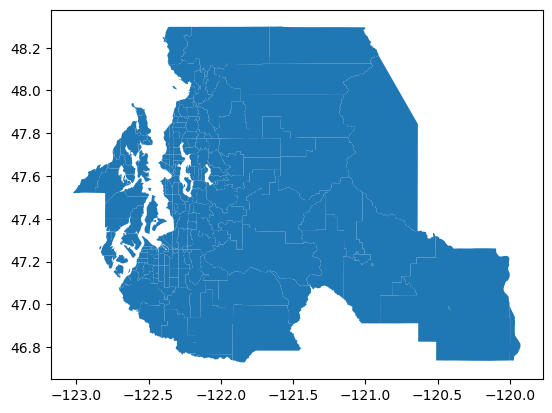

In [188]:
import geopandas as gp

gdf = gp.read_file('Zip_Codes.zip')
gdf.plot()


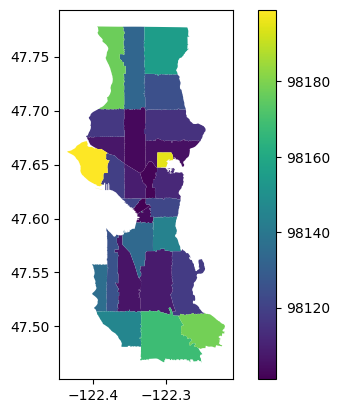

In [189]:

def read_zip_code_file(filename: str) -> list:
    out = []
    with open(filename, 'r') as f:
        for line in f:
            out.append(int(line.strip('\n')))
    return out


zip_code_filename = 'seattle_zip_codes.txt'
zip_codes = read_zip_code_file(zip_code_filename)
gdf['ZIP'].to_csv('temp.csv')
gdf = gdf[gdf['ZIP'].isin(zip_codes)]
gdf.plot('ZIP', legend=True)

gdf['ZIP'].to_csv('tempc2.csv')


In [190]:
# Perform cat/dog ratio analysis
import pandas as pd
import numpy as np

data_filename = "Seattle_Pet_Licenses.csv"
df = pd.read_csv(data_filename)
df_ratio = df.pivot_table(values='License Number', index='ZIP Code', columns='Species',
                          aggfunc=np.count_nonzero)
df_ratio = df_ratio.drop(labels=['Goat', 'Pig'], axis='columns')
df_ratio.fillna(1)
df_ratio['RATIO'] = df_ratio['Cat'] / df_ratio['Dog']
df_ratio['TOTAL'] = df_ratio['Cat'] + df_ratio['Dog']
df_ratio = df_ratio.sort_values(by='RATIO', ascending=False)

df_ratio.index = pd.to_numeric(df_ratio.index, downcast='integer')


<Axes: >

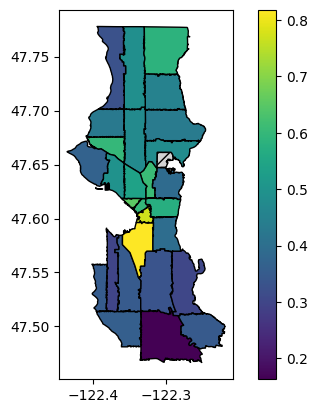

In [191]:
gdf = gdf.merge(df_ratio, how='left', left_on='ZIP', right_index=True)
gdf.plot('RATIO', legend=True, edgecolor='black',
         missing_kwds={
             'color': 'lightgrey',
             'edgecolor': 'black',
             'hatch': '///',
             'label': 'Missing values'
         })


<Axes: >

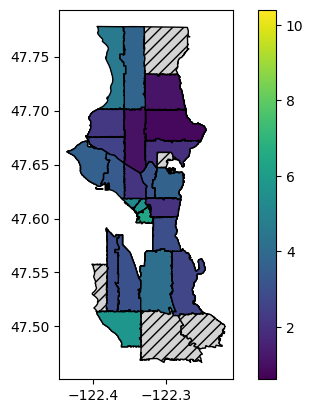

In [192]:
# Housing Data
# Pet registration / total population

df_housing = pd.read_csv(
    './processed_data/Population and Housing Basics_zip_added.csv')
gdf = gdf.merge(df_housing, how='left', left_on='ZIP', right_on='zip')
gdf['PETS_POPULATION'] = gdf['Total Population'] / gdf['TOTAL']

# cats and dogs per capita
gdf['CATS_PER_CAPITA'] = gdf['Cat'] / gdf['Total Population']
gdf['DOGS_PER_CAPITA'] = gdf['Dog'] / gdf['Total Population']

gdf = gdf[gdf['zip'] != 98134]
gdf.plot('PETS_POPULATION', legend=True, edgecolor='black',
         missing_kwds={
             'color': 'lightgrey',
             'edgecolor': 'black',
             'hatch': '///',
             'label': 'Missing values'
         })


<Axes: >

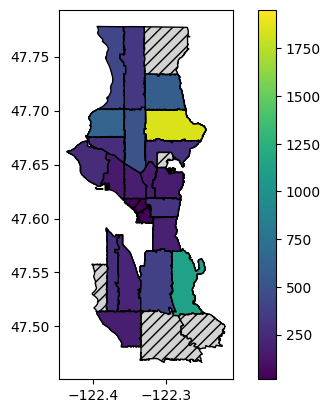

In [193]:

# Pets / housing density
gdf['PETS_DENSITY'] = gdf['TOTAL'] / gdf['Households per Gross Land Acre']
gdf.plot('PETS_DENSITY', legend=True, edgecolor='black',
         missing_kwds={
             'color': 'lightgrey',
             'edgecolor': 'black',
             'hatch': '///',
             'label': 'Missing values'
         })


In [194]:
from scipy.stats import pearsonr

# Add detailed housing data
detailed_housing_filename = './processed_data/Housing Tenure Values and Rents_zip_added.csv'
df_detailed_housing = pd.read_csv(detailed_housing_filename)

gdf = gdf.merge(df_detailed_housing, how='left', left_on='ZIP', right_on='zip')

gdf.head(10).to_csv('temp.csv')

percent_owner_occupied = gdf['Percent of Total Housing Units (including Vacant) that are Owner-Occupied'].fillna(
    value=0)
percent_renter_occupied = gdf['Percent of Total Housing Units (including Vacant) that are Renter-Occupied'].fillna(value=0)
median_home_value = gdf['Median Home Value (for Owner-Occupied Housing Units)_x'].fillna(value=0)
dog_per_capita = gdf['DOGS_PER_CAPITA'].fillna(value=0)
cats_per_capita = gdf['CATS_PER_CAPITA'].fillna(value=0)

# Owner Occupied
print('Dogs per capita vs. Owner-Occupied Housing')
print(f'\tCorrelation coeff: {pearsonr(percent_owner_occupied, dog_per_capita).statistic}')

print('Cats per capita vs. Owner-Occupied Housing')
print(f'\tCorrelation coeff: {pearsonr(percent_owner_occupied, cats_per_capita).statistic}')

# Renter Occupied
print('\nDogs per capita vs. Renter-Occupied Housing')
print(f'\tCorrelation coeff: {pearsonr(percent_renter_occupied, dog_per_capita).statistic}')

print('Cats per capita vs. Renter-Occupied Housing')
print(f'\tCorrelation coeff: {pearsonr(percent_renter_occupied, cats_per_capita).statistic}')

# Median home value
print('\nDogs per capita vs. Median Home Value')
print(f'\tCorrelation coeff: {pearsonr(median_home_value, dog_per_capita).statistic}')

print('Cats per capita vs. Median Home Value')
print(f'\tCorrelation coeff: {pearsonr(median_home_value, cats_per_capita).statistic}')

Dogs per capita vs. Owner-Occupied Housing
	Correlation coeff: 0.3431701416491914
Cats per capita vs. Owner-Occupied Housing
	Correlation coeff: 0.28834854587787273

Dogs per capita vs. Renter-Occupied Housing
	Correlation coeff: -0.1977399531869567
Cats per capita vs. Renter-Occupied Housing
	Correlation coeff: -0.14959006962465782

Dogs per capita vs. Median Home Value
	Correlation coeff: 0.3107435013301798
Cats per capita vs. Median Home Value
	Correlation coeff: 0.34090109059331986
